In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('./resources/Cleaned_data_without_outliers.csv')

# Display the first few rows of the dataframe
df.head()

,price,beds,bath,propertysqft,borough,property_category,type,sublocality_ext,postcode,state_ext,latitude,longitude,price_per_sqft
0,2800000,5,4.0,3400.0,Brooklyn,Residential,pending,Brooklyn,11218,New York,40.643517,-73.966956,823.529412
1,2800000,3,3.0,3341.0,Brooklyn,Residential,condo,Brooklyn,11211,New York,40.709601,-73.968217,838.072433
2,2799000,3,3.0,2350.0,Brooklyn,Residential,condo,Brooklyn,11215,New York,40.667604,-73.993127,1191.063830
3,2798000,5,3.0,3400.0,Brooklyn,Residential,multi-family home,Brooklyn,11218,New York,40.657854,-73.975525,822.941176
4,2750000,3,3.0,2782.0,Brooklyn,Commercial,condo,Brooklyn,11231,New York,40.681105,-74.009814,988.497484


In [3]:
X = df.drop(['price','latitude','longitude','state_ext','postcode','sublocality_ext'], axis=1)
y = df['price']

In [4]:
X.dtypes

beds                   int64
bath                 float64
propertysqft         float64
borough               object
property_category     object
type                  object
price_per_sqft       float64
dtype: object

In [5]:
select_features = ["beds", "bath", "propertysqft","price_per_sqft","borough","property_category", "type"]

# Create another variable X_sel with only the columns
# in the "select_features" list

X_sel = df[select_features]
X_sel.head()

,beds,bath,propertysqft,price_per_sqft,borough,property_category,type
0,5,4.0,3400.0,823.529412,Brooklyn,Residential,pending
1,3,3.0,3341.0,838.072433,Brooklyn,Residential,condo
2,3,3.0,2350.0,1191.063830,Brooklyn,Residential,condo
3,5,3.0,3400.0,822.941176,Brooklyn,Residential,multi-family home
4,3,3.0,2782.0,988.497484,Brooklyn,Commercial,condo


In [6]:
# Set the target variable y
y = df["price"].values.reshape(-1, 1)

In [7]:
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X_sel, y, random_state=42)

In [8]:
# Display X_train
X_train

,beds,bath,propertysqft,price_per_sqft,borough,property_category,type
2150,2,2.000000,800.000000,531.250000,The Bronx,Residential,condo
1891,3,1.000000,2184.207862,251.349704,Queens,Residential,house
497,4,4.000000,2393.000000,501.420811,Staten Island,Residential,pending
1845,3,2.000000,980.000000,571.326531,Staten Island,Residential,townhouse
342,2,1.000000,2184.207862,618.073043,Brooklyn,Residential,condo
...,...,...,...,...,...,...,...
1638,3,2.000000,1575.000000,399.365079,The Bronx,Residential,house
1095,3,2.373861,2184.207862,366.265049,Brooklyn,Residential,land
1130,5,3.000000,2184.207862,365.807675,Queens,Residential,house
1294,1,1.000000,2184.207862,342.916081,Manhattan,Residential,pending


In [9]:
from sklearn.preprocessing import OneHotEncoder

# Use a OneHotEncoder to convert the training data to numerical values
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype='int')
X_train_encoded = pd.DataFrame(data=ohe.fit_transform(X_train[['borough','property_category','type']]), columns=ohe.get_feature_names_out())
X_train_encoded

,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,borough_The Bronx,property_category_Commercial,property_category_Hospitality,property_category_Other,property_category_Residential,type_co-op,...,type_condop,type_contingent,type_for sale,type_foreclosure,type_house,type_land,type_mobile house,type_multi-family home,type_pending,type_townhouse
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2028,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2029,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2030,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [10]:
# Encode the test data
X_test_encoded = pd.DataFrame(data=ohe.transform(X_test[['borough','property_category','type']]), columns=ohe.get_feature_names_out())
X_test_encoded

,borough_Brooklyn,borough_Manhattan,borough_Queens,borough_Staten Island,borough_The Bronx,property_category_Commercial,property_category_Hospitality,property_category_Other,property_category_Residential,type_co-op,...,type_condop,type_contingent,type_for sale,type_foreclosure,type_house,type_land,type_mobile house,type_multi-family home,type_pending,type_townhouse
0,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0,1,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
674,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
675,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
676,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [11]:
from sklearn.preprocessing import StandardScaler

# Create the StandardScaler instance and using it to scale the data

scaler = StandardScaler()

In [12]:
# Scale the training data
X_train_scaled=scaler.fit_transform(X_train[['beds','bath','propertysqft','price_per_sqft']])
X_test_scaled=scaler.transform(X_test[['beds','bath','propertysqft','price_per_sqft']])

In [13]:
Scaled_df=pd.DataFrame(X_train_scaled,columns=['beds','bath','propertysqft','price_per_sqft'])
Scaled_df_test=pd.DataFrame(X_test_scaled,columns=['beds','bath','propertysqft','price_per_sqft'])

In [14]:
X_train_final=pd.concat([Scaled_df,X_train_encoded], axis=1)
X_test_final=pd.concat([Scaled_df_test,X_test_encoded], axis=1)

In [15]:
print(X_train_final.shape)
print(X_test_final.shape)

(2032, 25)
(678, 25)


Running GridSearchCV for Linear Regression...
Best Parameters for Linear Regression: {'fit_intercept': True}
Linear Regression - MSE: 20109636019.6248, R2: 0.9054

Running GridSearchCV for Decision Tree...
Best Parameters for Decision Tree: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Decision Tree - MSE: 3117504656.9121, R2: 0.9853

Running GridSearchCV for Random Forest...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest - MSE: 577451937.7257, R2: 0.9973

Running GridSearchCV for Gradient Boosting...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?
/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y w

Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
Gradient Boosting - MSE: 604014418.5616, R2: 0.9972

Running GridSearchCV for Support Vector Regressor...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

Best Parameters for Support Vector Regressor: {'C': 10, 'epsilon': 0.01, 'kernel': 'linear'}
Support Vector Regressor - MSE: 206634421425.1758, R2: 0.0277



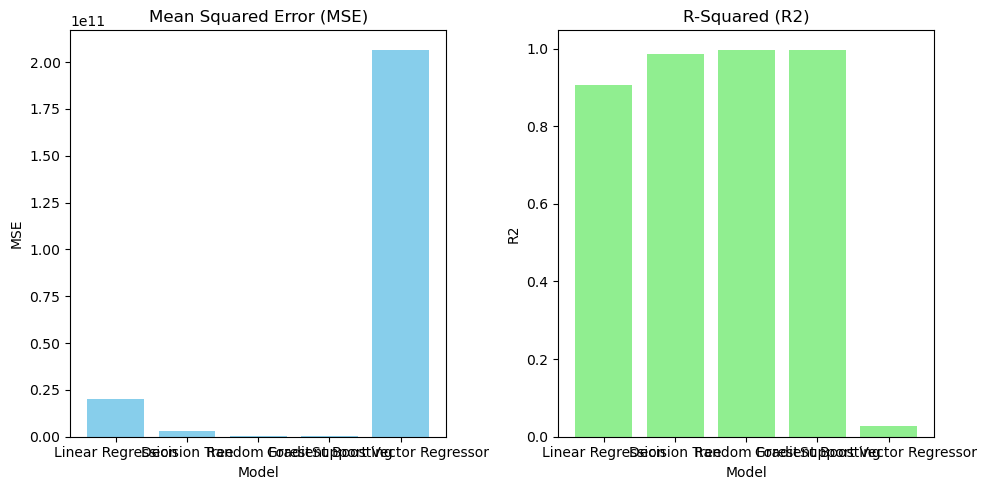


Based on the evaluation, the best model is: Random Forest (highest R2 score)


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Support Vector Regressor': SVR()
}

# Hyperparameters for Grid Search
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
    },
    'Decision Tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'bootstrap': [True, False]
    },
    'Gradient Boosting': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'Support Vector Regressor': {
        'C': [0.1, 1, 10],
        'epsilon': [0.01, 0.1, 0.2],
        'kernel': ['linear', 'rbf']
    }
}

# Step 2 & 3: Train and evaluate models with Grid Search
best_models = {}
mse_scores = []
r2_scores = []

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}...")
    
    # Get the parameter grid for this model
    param_grid = param_grids[model_name]
    
    # Perform Grid Search with 5-fold cross-validation
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    
    # Train the model
    grid_search.fit(X_train_final, y_train)
    
    # Best parameters and best score
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    # Make predictions with the best model
    y_pred = best_model.predict(X_test_final)
    
    # Calculate MSE and R2
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the best model and the evaluation metrics
    best_models[model_name] = best_model
    mse_scores.append(mse)
    r2_scores.append(r2)
    
    print(f"Best Parameters for {model_name}: {best_params}")
    print(f"{model_name} - MSE: {mse:.4f}, R2: {r2:.4f}\n")

# Step 4: Plot the results

# Plot MSE scores
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(models.keys(), mse_scores, color='skyblue')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Model')
plt.ylabel('MSE')

# Plot R2 scores
plt.subplot(1, 2, 2)
plt.bar(models.keys(), r2_scores, color='lightgreen')
plt.title('R-Squared (R2)')
plt.xlabel('Model')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

# Step 5: Suggest the best model
best_model_index = np.argmax(r2_scores)
best_model_name = list(models.keys())[best_model_index]

print(f"\nBased on the evaluation, the best model is: {best_model_name} (highest R2 score)")


In [ ]:
#Train the model
model = LinearRegression()




In [ ]:
# Fit the model to the full training data. 
model.fit(X_train_final, y_train)

In [ ]:
# Predict the model
# Calculate the mean_squared_error and the r-squared value
# for the testing data

# Use our models to make predictions
predicted_lr = model.predict(X_test_final)

# Score the predictions with mse and r2
mse2 = mean_squared_error(y_test, predicted_lr)
r2lr = r2_score(y_test, predicted_lr)

print("---------------------")
print(f"Select Features:")
print(f"mean squared error (MSE): {mse2}")
print(f"R-squared (R2): {r2lr}")

In [ ]:
import statsmodels.api as sm

# Use the statsmodels package to create and fit a linear regression
lr = sm.OLS(y_train, X_train).fit()

In [ ]:
# Create a variable to hold the p-values of all columns sorted in ascending order
p_values = model.pvalues.sort_values()
p_values